# Probabilistic Scheduling

## Timing Measurements

Read the `.json` files from `../scripts` and extract the `t` values from each file as timing measurements for that file; plot a histogram for each file.

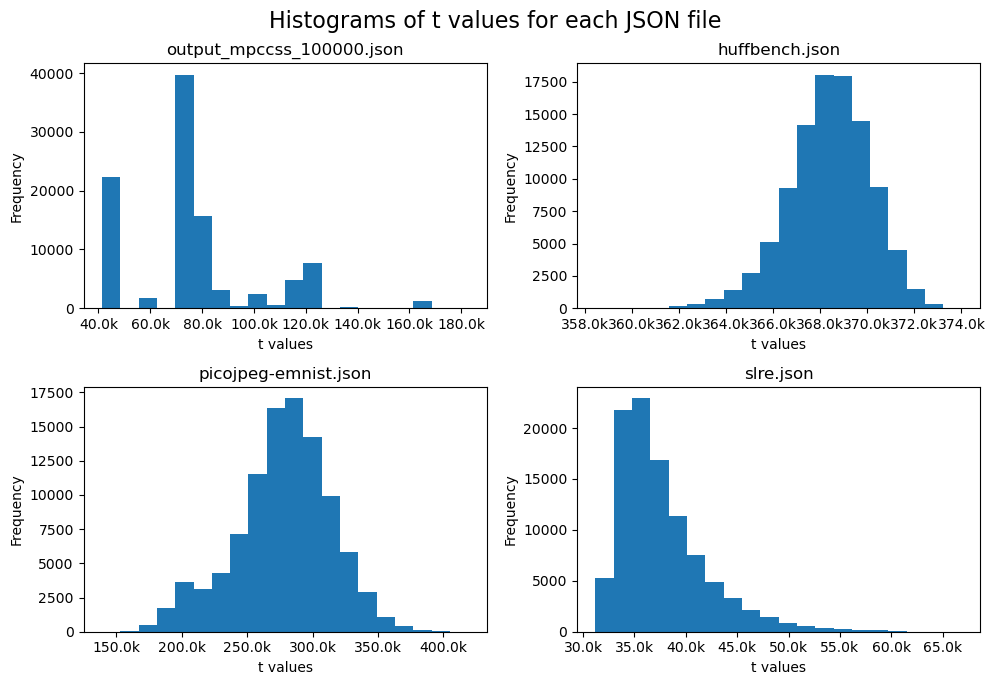

In [41]:
import os
import json
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as mticker

# Directory containing the JSON files
json_directory = '../scripts'

# List to hold timing measurements
timing_measurements = {}

# Iterate over all files in the directory
for filename in os.listdir(json_directory):
    if filename.endswith('.json') and not filename.startswith('exc-'):
        file_path = os.path.join(json_directory, filename)
        with open(file_path, 'r') as file:
            timing_measurements[filename] = json.load(file)["t"][1:]

# Determine the number of rows and columns
num_files = len(timing_measurements)
num_cols = 2
num_rows = math.ceil(num_files / num_cols)

# Create subplots using matplotlib
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))
axes = axes.flatten() if num_files > 1 else [axes]

# Add histograms to the subplot figure
for i, (filename, t_values) in enumerate(timing_measurements.items()):
    axes[i].hist(t_values, bins=20)
    axes[i].set_title(filename)
    axes[i].set_xlabel("t values")
    axes[i].set_ylabel("Frequency")
    # Abbreviate x-axis values
    axes[i].xaxis.set_major_formatter(mticker.FuncFormatter(
        lambda x, pos: f'{x/1e6:.1f}M' if x >= 1e6 else (f'{x/1e3:.1f}k' if x >= 1e3 else f'{x:.0f}')
    ))

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
fig.suptitle("Histograms of t values for each JSON file", fontsize=16)
fig.tight_layout(rect=[0, 0.3, 1, 1])

plt.show()

In [12]:
import os
import pandas as pd
from plot import plot

def plot_job_id(job_id: int):
    directory = f'{os.getcwd()}/../data-csv/{job_id}'

    # List to hold dataframes
    dfs = []

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)

    # Combine all dataframes into one
    combined_df = pd.concat(dfs, ignore_index=True)
    # combined_df = combined_df.loc[combined_df['period'] == 0.05]

    def filter_fn(row):
        return (
            row['hit_chance'] > 0.5 and 
            row['utilization'] == 1
        )

    # Display the combined dataframe
    print(combined_df)

    return plot(combined_df, 'period', allpoints=True, filter_fn=filter_fn)

In [13]:
# Directory containing the CSV files
F1T_synt = 49823588
F1T_jpeg = 49826748
CC2_synt = 49824864
CC2_huff = 49826765

In [14]:
plot_job_id(F1T_synt)

     system distribution batchsize  hit_chance  period  utilization  \
0       F1T    synthetic     30000    0.024249  0.0535         0.19   
1       F1T    synthetic     30000    0.096508  0.0535         0.20   
2       F1T    synthetic     30000    0.160269  0.0535         0.21   
3       F1T    synthetic     30000    0.216867  0.0535         0.22   
4       F1T    synthetic     30000    0.267382  0.0535         0.23   
...     ...          ...       ...         ...     ...          ...   
5674    F1T    synthetic     30000    0.869560  0.0405         0.96   
5675    F1T    synthetic     30000    0.871572  0.0405         0.97   
5676    F1T    synthetic     30000    0.873533  0.0405         0.98   
5677    F1T    synthetic     30000    0.875444  0.0405         0.99   
5678    F1T    synthetic     30000    0.877308  0.0405         1.00   

              p99    p99_lower     p99_upper  
0     3033.341035  2787.966109   3370.259386  
1     9648.387235  9283.042484  10088.040433  
2     

/var/folders/2g/mqflw2_n6qjg2wfynr_w3s940000gn/T/ipykernel_39435/3536976897.py:19: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [15]:
plot_job_id(F1T_jpeg)

     system          distribution batchsize  hit_chance  period  utilization  \
0       F1T  picojpeg-emnist.json     30000     0.00001  0.0535         0.16   
1       F1T  picojpeg-emnist.json     30000     0.00003  0.0535         0.17   
2       F1T  picojpeg-emnist.json     30000     0.00013  0.0535         0.18   
3       F1T  picojpeg-emnist.json     30000     0.00096  0.0535         0.19   
4       F1T  picojpeg-emnist.json     30000     0.00306  0.0535         0.20   
...     ...                   ...       ...         ...     ...          ...   
6231    F1T  picojpeg-emnist.json     30000     1.00000  0.0405         0.96   
6232    F1T  picojpeg-emnist.json     30000     1.00000  0.0405         0.97   
6233    F1T  picojpeg-emnist.json     30000     1.00000  0.0405         0.98   
6234    F1T  picojpeg-emnist.json     30000     1.00000  0.0405         0.99   
6235    F1T  picojpeg-emnist.json     30000     1.00000  0.0405         1.00   

             p99   p99_lower   p99_uppe

/var/folders/2g/mqflw2_n6qjg2wfynr_w3s940000gn/T/ipykernel_39435/3536976897.py:19: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [16]:
plot_job_id(CC2_synt)

/var/folders/2g/mqflw2_n6qjg2wfynr_w3s940000gn/T/ipykernel_39435/3536976897.py:19: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



     system distribution batchsize  hit_chance  period  utilization       p99  \
0       CC2    synthetic     30000    0.024249  0.0535         0.19  2.477060   
1       CC2    synthetic     30000    0.096508  0.0535         0.20  2.329241   
2       CC2    synthetic     30000    0.160269  0.0535         0.21  1.865732   
3       CC2    synthetic     30000    0.216867  0.0535         0.22  1.582396   
4       CC2    synthetic     30000    0.267382  0.0535         0.23  1.240888   
...     ...          ...       ...         ...     ...          ...       ...   
5674    CC2    synthetic     30000    0.869560  0.0405         0.96  0.154330   
5675    CC2    synthetic     30000    0.871572  0.0405         0.97  0.153939   
5676    CC2    synthetic     30000    0.873533  0.0405         0.98  0.153649   
5677    CC2    synthetic     30000    0.875444  0.0405         0.99  0.153404   
5678    CC2    synthetic     30000    0.877308  0.0405         1.00  0.152770   

      p99_lower  p99_upper 

In [17]:
plot_job_id(CC2_huff)

/var/folders/2g/mqflw2_n6qjg2wfynr_w3s940000gn/T/ipykernel_39435/3536976897.py:19: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



     system    distribution batchsize  hit_chance  period  utilization  \
0       CC2  huffbench.json     30000    0.001330  0.0535         0.41   
1       CC2  huffbench.json     30000    0.923509  0.0535         0.42   
2       CC2  huffbench.json     30000    1.000000  0.0535         0.43   
3       CC2  huffbench.json     30000    1.000000  0.0535         0.44   
4       CC2  huffbench.json     30000    1.000000  0.0535         0.45   
...     ...             ...       ...         ...     ...          ...   
2683    CC2  huffbench.json     30000    1.000000  0.0405         0.96   
2684    CC2  huffbench.json     30000    1.000000  0.0405         0.97   
2685    CC2  huffbench.json     30000    1.000000  0.0405         0.98   
2686    CC2  huffbench.json     30000    1.000000  0.0405         0.99   
2687    CC2  huffbench.json     30000    1.000000  0.0405         1.00   

           p99  p99_lower  p99_upper  
0     1.689602   1.689144   1.689602  
1     0.151379   0.150899   0.151